In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
gdp_df = pd.read_csv('../data/gdp_percapita.csv.csv', skiprows=[r for r in range(6608,6611)] )

In [3]:
gdp_df.head(6)

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2018,2190.240321,NaN
1,Afghanistan,2017,2202.570851,NaN
2,Afghanistan,2016,2200.764487,NaN
3,Afghanistan,2015,2212.750899,NaN
4,Afghanistan,2014,2249.253738,NaN
5,Afghanistan,2013,2264.317575,NaN


In [4]:
internet_df = pd.read_csv('../data/internet_use.csv.csv', skiprows=[r for r in range(4496,4688)])

In [5]:
internet_df.tail()

,Country or Area,Year,Value,Value Footnotes
4490,Zimbabwe,1997,0.033080,NaN
4491,Zimbabwe,1996,0.016790,NaN
4492,Zimbabwe,1995,0.007684,NaN
4493,Zimbabwe,1994,0.001739,NaN
4494,Zimbabwe,1990,0.000000,NaN


In [6]:
internet_df.head(6)

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2014,6.390000,NaN
1,Afghanistan,2013,5.900000,NaN
2,Afghanistan,2012,5.454545,NaN
3,Afghanistan,2011,5.000000,NaN
4,Afghanistan,2010,4.000000,NaN
5,Afghanistan,2009,3.550000,NaN


In [7]:
internet_df.shape

(4495, 4)

In [8]:
gdp_df.shape

(6606, 4)

In [9]:
gdp_df.tail(10)

,Country or Area,Year,Value,Value Footnotes
6596,Zimbabwe,1999,3600.849291,NaN
6597,Zimbabwe,1998,3653.920016,NaN
6598,Zimbabwe,1997,3580.048793,NaN
6599,Zimbabwe,1996,3520.430146,NaN
6600,Zimbabwe,1995,3226.413930,NaN
6601,Zimbabwe,1994,3263.934978,NaN
6602,Zimbabwe,1993,3033.504852,NaN
6603,Zimbabwe,1992,3054.889178,NaN
6604,Zimbabwe,1991,3426.598094,NaN
6605,Zimbabwe,1990,3324.348171,NaN


In [10]:
gdp_df.drop(columns= 'Value Footnotes', inplace = True)


In [11]:
internet_df.drop(columns='Value Footnotes', inplace = True)

In [12]:
gdp_df = gdp_df.rename(columns={'Country or Area':'Country','Value':'GDP_Per_Capita'})


In [13]:
internet_df = internet_df.rename(columns={'Country or Area':'Country','Value':'Internet_Users_Pct'})


In [14]:
gdp_df.tail()

,Country,Year,GDP_Per_Capita
6601,Zimbabwe,1994,3263.934978
6602,Zimbabwe,1993,3033.504852
6603,Zimbabwe,1992,3054.889178
6604,Zimbabwe,1991,3426.598094
6605,Zimbabwe,1990,3324.348171


In [15]:
gdp_and_internet_use = gdp_df.merge(internet_df, on=["Country","Year"], how='outer')


In [16]:
gdp_and_internet_use.head(5)

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
0,Afghanistan,2018,2190.240321,NaN
1,Afghanistan,2017,2202.570851,NaN
2,Afghanistan,2016,2200.764487,NaN
3,Afghanistan,2015,2212.750899,NaN
4,Afghanistan,2014,2249.253738,6.39


In [17]:
gdp_and_internet_use.tail(5)

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
7659,Yemen,1999,NaN,0.056629
7660,Yemen,1998,NaN,0.023323
7661,Yemen,1997,NaN,0.015025
7662,Yemen,1996,NaN,0.000621
7663,Yemen,1990,NaN,0.000000


In [18]:
gdp_and_internet_use_subset_years = gdp_and_internet_use.query('Year == 2004 or Year == 2009 or Year == 2014')

In [19]:
gdp_and_internet_use_subset_years.head()

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
4,Afghanistan,2014,2249.253738,6.390000
9,Afghanistan,2009,1881.777626,3.550000
14,Afghanistan,2004,1284.127338,0.105809
21,Albania,2014,11828.232264,60.100000
26,Albania,2009,10528.778102,41.200000


In [20]:
gdp_and_internet_use_2004 = gdp_and_internet_use_subset_years.query('Year == 2004')

In [21]:
gdp_and_internet_use_2009 = gdp_and_internet_use_subset_years.query('Year == 2009')

In [22]:
gdp_and_internet_use_2014 = gdp_and_internet_use_subset_years.query('Year == 2014')

In [23]:
gdp_and_internet_use_2004.head()

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
14,Afghanistan,2004,1284.127338,0.105809
31,Albania,2004,7738.542836,2.420388
60,Algeria,2004,9898.310490,4.634475
89,Angola,2004,5568.959139,0.464815
118,Antigua and Barbuda,2004,18742.463741,24.266544


In [24]:
gdp_and_internet_use_2009.head()

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
9,Afghanistan,2009,1881.777626,3.55
26,Albania,2009,10528.778102,41.20
55,Algeria,2009,10610.711405,11.23
84,Angola,2009,7610.310423,6.00
113,Antigua and Barbuda,2009,19989.092913,42.00


In [25]:
gdp_and_internet_use_2014.head()

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
4,Afghanistan,2014,2249.253738,6.39
21,Albania,2014,11828.232264,60.10
50,Algeria,2014,11329.428688,18.09
79,Angola,2014,8239.832077,21.26
108,Antigua and Barbuda,2014,18104.241470,64.00


In [26]:
internet_use_2004 = gdp_and_internet_use_2004.sort_values('Internet_Users_Pct', ascending=False)

In [27]:
internet_use_2004_max = internet_use_2004.head(5)
internet_use_2004_max

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
5785,Sweden,2004,45029.814344,83.89
2517,Iceland,2004,45380.965464,83.88
1384,Denmark,2004,50566.988088,80.93
4471,Norway,2004,59647.501415,77.69
7159,Korea (Rep. of),2004,NaN,72.70


In [28]:
internet_use_2004_min = internet_use_2004.sort_values('Internet_Users_Pct', ascending=True)
internet_use_2004_min = internet_use_2004_min.head(5)
internet_use_2004_min

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
6847,Dem. People's Rep. of Korea,2004,NaN,0.000000
4166,Myanmar,2004,1696.881760,0.024337
3395,Liberia,2004,1181.546158,0.031011
5843,Tajikistan,2004,1737.743630,0.077480
14,Afghanistan,2004,1284.127338,0.105809


In [29]:
internet_use_2009 = gdp_and_internet_use_2009.sort_values('Internet_Users_Pct', ascending=False)

In [30]:
internet_use_2009_max = internet_use_2009.head(5)
internet_use_2009_max

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
2512,Iceland,2009,48428.312438,93.00
4466,Norway,2009,60620.334503,92.08
5780,Sweden,2009,46185.526525,91.00
4263,Netherlands,2009,51850.500537,89.63
3540,Luxembourg,2009,105077.951508,87.31


In [31]:
internet_use_2009_min = internet_use_2009.sort_values('Internet_Users_Pct', ascending=True)
internet_use_2009_min = internet_use_2009_min.head(5)
internet_use_2009_min

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
6842,Dem. People's Rep. of Korea,2009,NaN,0.000000
5983,Timor-Leste,2009,2724.834868,0.185252
4161,Myanmar,2009,2874.780227,0.220000
5225,Sierra Leone,2009,1372.392285,0.260000
862,Cambodia,2009,2603.583778,0.530000


In [32]:
internet_use_2014 = gdp_and_internet_use_2014.sort_values('Internet_Users_Pct', ascending=False)

In [33]:
internet_use_2014_max = internet_use_2014.head(5)
internet_use_2014_max

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
2507,Iceland,2014,49911.069825,98.16
6649,Bermuda,2014,NaN,96.80
4461,Norway,2014,61308.763730,96.30
1374,Denmark,2014,52172.606425,95.99
6609,Andorra,2014,NaN,95.90


In [34]:
internet_use_2014_min = internet_use_2014.sort_values('Internet_Users_Pct', ascending=True)
internet_use_2014_min= internet_use_2014_min.head(5)
internet_use_2014_min

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
6838,Dem. People's Rep. of Korea,2014,NaN,0.00
6896,Eritrea,2014,NaN,0.99
5978,Timor-Leste,2014,3264.739189,1.14
770,Burundi,2014,886.235777,1.38
7433,Somalia,2014,NaN,1.63


In [35]:
gdp_per_capita_2004 = gdp_and_internet_use_2004.sort_values('GDP_Per_Capita', ascending=False)

In [36]:
gdp_per_capita_2004_max = gdp_per_capita_2004.head(5)
gdp_per_capita_2004_max

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
3545,Luxembourg,2004,102850.273309,65.880000
4944,Qatar,2004,98423.340291,20.701648
6276,United Arab Emirates,2004,97758.023345,30.131296
5097,San Marino,2004,80413.134071,50.566343
3574,"Macao SAR, China",2004,72944.409424,NaN


In [37]:
gdp_per_capita_2004_min = gdp_per_capita_2004.sort_values('GDP_Per_Capita', ascending=True)
gdp_per_capita_2004_min = gdp_per_capita_2004_min.head(5)
gdp_per_capita_2004_min

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
1355,Dem. Rep. Congo,2004,757.685942,NaN
3632,Malawi,2004,775.346132,0.347505
1764,Ethiopia,2004,793.093786,0.155335
4137,Mozambique,2004,793.168857,0.679448
780,Burundi,2004,817.460585,0.349060


In [38]:
gdp_per_capita_2009 = gdp_and_internet_use_2009.sort_values('GDP_Per_Capita', ascending=False)

In [39]:
gdp_per_capita_2009_max = gdp_per_capita_2009.head(5)
gdp_per_capita_2009_max

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
3540,Luxembourg,2009,105077.951508,87.31
3569,"Macao SAR, China",2009,95939.340822,NaN
4939,Qatar,2009,94440.370835,53.10
5092,San Marino,2009,76756.665732,54.21
975,Cayman Islands,2009,70287.622992,64.50


In [40]:
gdp_per_capita_2009_min = gdp_per_capita_2009.sort_values('GDP_Per_Capita', ascending=True)
gdp_per_capita_2009_min = gdp_per_capita_2009_min.head(5)
gdp_per_capita_2009_min

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
775,Burundi,2009,831.564131,0.90
1350,Dem. Rep. Congo,2009,835.611696,NaN
3627,Malawi,2009,932.867635,1.07
4350,Niger,2009,990.354227,0.76
4132,Mozambique,2009,991.581978,2.68


In [41]:
gdp_per_capita_2014 = gdp_and_internet_use_2014.sort_values('GDP_Per_Capita', ascending=False)

In [42]:
gdp_per_capita_2014_max = gdp_per_capita_2014.head(5)
gdp_per_capita_2014_max

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
3564,"Macao SAR, China",2014,156514.133850,NaN
3535,Luxembourg,2014,108911.348894,94.67
4934,Qatar,2014,97938.305225,91.49
5249,Singapore,2014,87808.663157,82.00
970,Cayman Islands,2014,66195.475587,74.10


In [43]:
gdp_per_capita_2014_min = gdp_per_capita_2014.sort_values('GDP_Per_Capita', ascending=True)
gdp_per_capita_2014_min = gdp_per_capita_2014_min.head(5)
gdp_per_capita_2014_min

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
983,Central African Republic,2014,822.610458,NaN
770,Burundi,2014,886.235777,1.38
3622,Malawi,2014,1027.208496,5.83
1345,Dem. Rep. Congo,2014,1029.790785,NaN
4345,Niger,2014,1126.153622,1.95


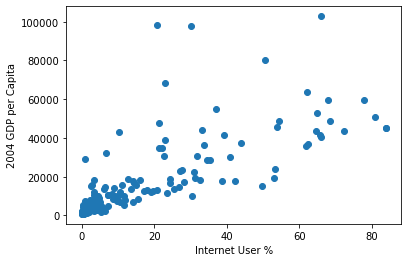

In [44]:
plt.scatter(x = 'Internet_Users_Pct', y = 'GDP_Per_Capita', data = gdp_and_internet_use_2004)
plt.xlabel('Internet User %')
plt.ylabel('2004 GDP per Capita');

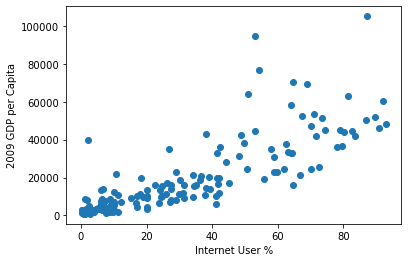

In [45]:
plt.scatter(x = 'Internet_Users_Pct', y = 'GDP_Per_Capita', data = gdp_and_internet_use_2009)
plt.xlabel('Internet User %')
plt.ylabel('2009 GDP per Capita');

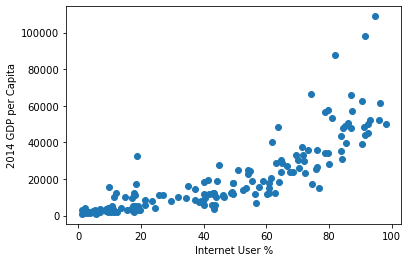

In [46]:
plt.scatter(x = 'Internet_Users_Pct', y = 'GDP_Per_Capita', data = gdp_and_internet_use_2014)
plt.xlabel('Internet User %')
plt.ylabel('2014 GDP per Capita');

#From 2004 to 2014, there are more internet users for countries with lower GDP per Capita.

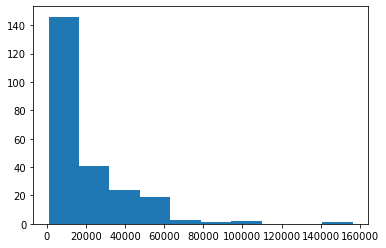

In [47]:
plt.hist(gdp_and_internet_use_2014.GDP_Per_Capita, bins = 10);

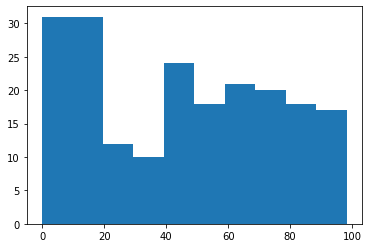

In [48]:
plt.hist(gdp_and_internet_use_2014.Internet_Users_Pct, bins = 10);

In [49]:
top_5_internet_use_2014 = internet_use_2014.head()
top_5_internet_use_2014

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
2507,Iceland,2014,49911.069825,98.16
6649,Bermuda,2014,NaN,96.80
4461,Norway,2014,61308.763730,96.30
1374,Denmark,2014,52172.606425,95.99
6609,Andorra,2014,NaN,95.90


In [50]:
gdp_and_internet_use_subset_years

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
4,Afghanistan,2014,2249.253738,6.390000
9,Afghanistan,2009,1881.777626,3.550000
14,Afghanistan,2004,1284.127338,0.105809
21,Albania,2014,11828.232264,60.100000
26,Albania,2009,10528.778102,41.200000
...,...,...,...,...
7627,Virgin Islands (U.S.),2009,NaN,27.396510
7632,Virgin Islands (U.S.),2004,NaN,27.377009
7644,Yemen,2014,NaN,22.550000
7649,Yemen,2009,NaN,9.960000


In [51]:
top_5_internet = pd.merge(gdp_and_internet_use_subset_years, top_5_internet_use_2014,
                               left_on ='Country', right_on ='Country',
                               how = 'inner')
top_5_internet = top_5_internet.drop(columns = ['Year_y','GDP_Per_Capita_y','Internet_Users_Pct_y'])
top_5_internet = top_5_internet.rename(columns ={'Year_x':'Year','GDP_Per_Capita_x':'GDP_Per_Capita','Internet_Users_Pct_x':'Internet_Users_Pct'})
top_5_internet

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
0,Denmark,2014,52172.606425,95.990000
1,Denmark,2009,50233.702688,86.840000
2,Denmark,2004,50566.988088,80.930000
3,Iceland,2014,49911.069825,98.160000
4,Iceland,2009,48428.312438,93.000000
5,Iceland,2004,45380.965464,83.880000
6,Norway,2014,61308.763730,96.300000
7,Norway,2009,60620.334503,92.080000
8,Norway,2004,59647.501415,77.690000
9,Andorra,2014,NaN,95.900000
